In [10]:
import pandas as pd
import numpy as np

In [11]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [12]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


###### Checando capítulos NCM recorrentes

Por meio do Jupyer Notebook "03_análises_diversas_e_representações_gráficas - PARTE 01", constata-se que a maior quantidade de mercadoria importada classifica-se no capítulo 85. De todo modo, para fins de implementação do modelo, entende-se que é desejável não apenas um código que tenha sido importado em quantidade, mas, sobretudo, que tenha sido recorrente. Segue, portanto, consulta ao capítulo da NCM em que os códigos NCM foram mais recorrentes.

In [13]:
# testa capítulos mais recorrentes
df["CAPÍTULO_NCM"] = df["CO_NCM"].astype(str).str[:2]

In [14]:
df["CAPÍTULO_NCM"].value_counts()

84    366185
85    347989
90    121571
39    104402
73     92280
       ...  
78       323
97       289
36       201
43       152
14       114
Name: CAPÍTULO_NCM, Length: 87, dtype: int64

In [15]:
df[df["CAPÍTULO_NCM"]=="84"]["CO_UNID"].value_counts()

11    243030
10    123155
Name: CO_UNID, dtype: int64

In [16]:
# uma vez constatado que o capítulo 84 é o mais recorrente, tentaremos reproduzir o modelo no âmbito desse capítulo.
df1=df[df["CAPÍTULO_NCM"]=="84"]

In [17]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CAPÍTULO_NCM
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725,84
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,4.108924,4.154725,84
33,2019-01,84833090,11,249,SP,4,817700,1410,416,164046,3.741055,3.884405,84
41,2019-01,84349000,10,386,RS,4,1017801,271,271,50073,3.741055,3.884405,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764414,2019-08,84209100,11,776,SP,1,817800,2,1,76,4.019382,3.778713,84
1764419,2019-08,84133010,11,247,PR,1,917800,3456,3356,89925,4.019382,3.778713,84
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713,84
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84


In [18]:
df1["CO_UNID"].value_counts()

11    243030
10    123155
Name: CO_UNID, dtype: int64

In [19]:
df1.drop(columns="CAPÍTULO_NCM", inplace=True)

D:\ANACONDA\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,4.108924,4.154725
33,2019-01,84833090,11,249,SP,4,817700,1410,416,164046,3.741055,3.884405
41,2019-01,84349000,10,386,RS,4,1017801,271,271,50073,3.741055,3.884405
...,...,...,...,...,...,...,...,...,...,...,...,...
1764414,2019-08,84209100,11,776,SP,1,817800,2,1,76,4.019382,3.778713
1764419,2019-08,84133010,11,247,PR,1,917800,3456,3356,89925,4.019382,3.778713
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713


In [21]:
# checando quais os códigos NCM mais recorrentes
g1=df1.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
1014,84818099,4736
260,84219999,4629
1046,84834090,4588
119,84139190,4290
1052,84839000,4281
...,...,...
374,84306911,1
931,84751000,1
361,84303110,1
948,84773010,1


In [22]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [23]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [24]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [25]:
g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 1014 to 0
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CO_NCM           1063 non-null   int64  
 1   contagem         1063 non-null   int64  
 2   % CO_NCM         1063 non-null   float64
 3   % CO_NCM ACUMUL  1063 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.5 KB


In [26]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 465 códigos NCM dentre os 1063.

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
1014,84818099,4736,0.012933,0.012933
260,84219999,4629,0.012641,0.025575
1046,84834090,4588,0.012529,0.038104
119,84139190,4290,0.011715,0.049819
1052,84839000,4281,0.011691,0.061510
...,...,...,...,...
161,84158110,101,0.000276,0.948906
798,84659400,100,0.000273,0.949179
29,84072190,100,0.000273,0.949452
727,84596900,100,0.000273,0.949725


In [27]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
435,84378010,100,0.000273,0.950271
796,84659310,99,0.000270,0.950541
691,84553090,98,0.000268,0.950809
939,84769000,98,0.000268,0.951077
924,84742090,98,0.000268,0.951344
...,...,...,...,...
374,84306911,1,0.000003,0.999989
931,84751000,1,0.000003,0.999992
361,84303110,1,0.000003,0.999995
948,84773010,1,0.000003,0.999997


In [28]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [29]:
mask=df1['CO_NCM'].isin(idx)
mask

9          False
10         False
12         False
33         False
41         False
           ...  
1764414    False
1764419    False
1764423    False
1764427    False
1764431    False
Name: CO_NCM, Length: 366185, dtype: bool

In [30]:
df1["CO_NCM_final"]=df1["CO_NCM"]

<ipython-input-30-e6965bd59fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_NCM_final"]=df1["CO_NCM"]


In [31]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df1.loc[mask, "CO_NCM_final"] = 99999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [32]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725,84719012
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,4.108924,4.154725,84439923
33,2019-01,84833090,11,249,SP,4,817700,1410,416,164046,3.741055,3.884405,84833090
41,2019-01,84349000,10,386,RS,4,1017801,271,271,50073,3.741055,3.884405,84349000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764414,2019-08,84209100,11,776,SP,1,817800,2,1,76,4.019382,3.778713,84209100
1764419,2019-08,84133010,11,247,PR,1,917800,3456,3356,89925,4.019382,3.778713,84133010
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713,84339090
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010


In [33]:
df1["CO_NCM_final"].value_counts()

99999999    18310
84818099     4736
84219999     4629
84834090     4588
84139190     4290
            ...  
84158110      101
84072190      100
84542010      100
84659400      100
84596900      100
Name: CO_NCM_final, Length: 466, dtype: int64

###### Checando códigos UNID MED EST (CO_UNID) recorrentes

In [34]:
g1=df1.groupby(['CO_UNID']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_UNID,contagem
1,11,243030
0,10,123155


In [35]:
df1["CO_UNID_final"]=df1["CO_UNID"]

<ipython-input-35-043d6a9cfec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_UNID_final"]=df1["CO_UNID"]


In [36]:
# no caso corrente não há CO_UNID minoritários para serem agrupados em categorial residual. Portanto, não se executará o código a seguir.
#mask=df1['CO_UNID']!=11
#mask

In [37]:
#df1.loc[mask, "CO_UNID_final"] = 99

In [38]:
df1["CO_UNID_final"].value_counts()

11    243030
10    123155
Name: CO_UNID_final, dtype: int64

###### Checando países (CO_PAIS) recorrentes

In [39]:
g1=df1.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
32,160,60006
51,249,46361
2,23,35159
79,386,26112
82,399,21024
...,...,...
35,165,1
137,748,1
27,145,1
143,770,1


In [40]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [41]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [42]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [43]:
g2.head()

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
32,160,60006,0.163868,0.163868
51,249,46361,0.126605,0.290473
2,23,35159,0.096014,0.386488
79,386,26112,0.071308,0.457796
82,399,21024,0.057414,0.515210


In [44]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_PAIS, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restingem a 32 países dentre os 168.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 32 to 136
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           32 non-null     int64  
 1   contagem          32 non-null     int64  
 2   % CO_PAIS         32 non-null     float64
 3   % CO_PAIS ACUMUL  32 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.2 KB


In [45]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
126,670,1993,0.005443,0.951961
21,105,1987,0.005426,0.957388
120,607,1457,0.003979,0.961367
55,267,1393,0.003804,0.965171
76,375,1324,0.003616,0.968786
...,...,...,...,...
35,165,1,0.000003,0.999989
137,748,1,0.000003,0.999992
27,145,1,0.000003,0.999995
143,770,1,0.000003,0.999997


In [46]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [47]:
mask=df1['CO_PAIS'].isin(idx)
mask

9          False
10         False
12         False
33         False
41         False
           ...  
1764414    False
1764419    False
1764423    False
1764427    False
1764431    False
Name: CO_PAIS, Length: 366185, dtype: bool

In [48]:
df1["CO_PAIS_final"]=df1["CO_PAIS"]

<ipython-input-48-b9c243d6eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_PAIS_final"]=df1["CO_PAIS"]


In [49]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df1.loc[mask, "CO_PAIS_final"] = 999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [50]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725,84719012,11,858
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210,11,249
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,4.108924,4.154725,84439923,10,858
33,2019-01,84833090,11,249,SP,4,817700,1410,416,164046,3.741055,3.884405,84833090,11,249
41,2019-01,84349000,10,386,RS,4,1017801,271,271,50073,3.741055,3.884405,84349000,10,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764414,2019-08,84209100,11,776,SP,1,817800,2,1,76,4.019382,3.778713,84209100,11,776
1764419,2019-08,84133010,11,247,PR,1,917800,3456,3356,89925,4.019382,3.778713,84133010,11,247
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713,84339090,10,63
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010,11,249


In [51]:
df1["CO_PAIS_final"].value_counts()

160    60006
249    46361
23     35159
386    26112
399    21024
999    19584
275    12618
161    11165
628    10249
190    10095
764     9705
493     8880
361     7952
245     7655
767     6805
72      6416
776     5905
791     5790
573     5702
149     5314
232     5038
603     4608
271     4523
63      4139
827     3622
87      3494
355     3400
351     2924
455     2681
858     2567
247     2396
365     2149
741     2147
Name: CO_PAIS_final, dtype: int64

###### Checando países (SG_UF_NCM) recorrentes

In [52]:
g1=df1.groupby(['SG_UF_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,SG_UF_NCM,contagem
25,SP,137976
23,SC,38823
17,PR,36379
10,MG,29395
18,RJ,28341
22,RS,27205
2,AM,17843
4,BA,10004
7,ES,7208
8,GO,6229


In [53]:
g1["% SG_UF_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [54]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [55]:
g2["% SG_UF_NCM ACUMUL"]=g2["% SG_UF_NCM"].cumsum()

In [56]:
g2.head()

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,137976,0.376793,0.376793
23,SC,38823,0.106020,0.482813
17,PR,36379,0.099346,0.582159
10,MG,29395,0.080274,0.662433
18,RJ,28341,0.077395,0.739828


In [57]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% SG_UF_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 11 UF dentre as 27.

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,137976,0.376793,0.376793
23,SC,38823,0.106020,0.482813
17,PR,36379,0.099346,0.582159
10,MG,29395,0.080274,0.662433
18,RJ,28341,0.077395,0.739828
22,RS,27205,0.074293,0.814121
2,AM,17843,0.048727,0.862848
4,BA,10004,0.027320,0.890168
7,ES,7208,0.019684,0.909852
8,GO,6229,0.017011,0.926862


In [58]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% SG_UF_NCM ACUMUL"]>0.95]
g4

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
15,PE,4229,0.011549,0.950063
5,CE,4182,0.011420,0.961484
20,RO,2950,0.008056,0.969540
1,AL,2518,0.006876,0.976416
11,MS,1742,0.004757,0.981173
12,MT,1476,0.004031,0.985204
6,DF,1305,0.003564,0.988768
19,RN,1152,0.003146,0.991914
14,PB,1019,0.002783,0.994697
9,MA,635,0.001734,0.996431


In [59]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["SG_UF_NCM"]

In [60]:
mask=df1['SG_UF_NCM'].isin(idx)
mask

9          False
10         False
12         False
33         False
41         False
           ...  
1764414    False
1764419    False
1764423    False
1764427    False
1764431    False
Name: SG_UF_NCM, Length: 366185, dtype: bool

In [61]:
df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]

<ipython-input-61-dd95862fade3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]


In [62]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df1.loc[mask, "SG_UF_NCM_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [63]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final,SG_UF_NCM_final
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725,84719012,11,858,SP
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210,11,249,SP
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,4.108924,4.154725,84439923,10,858,SP
33,2019-01,84833090,11,249,SP,4,817700,1410,416,164046,3.741055,3.884405,84833090,11,249,SP
41,2019-01,84349000,10,386,RS,4,1017801,271,271,50073,3.741055,3.884405,84349000,10,386,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764414,2019-08,84209100,11,776,SP,1,817800,2,1,76,4.019382,3.778713,84209100,11,776,SP
1764419,2019-08,84133010,11,247,PR,1,917800,3456,3356,89925,4.019382,3.778713,84133010,11,247,PR
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713,84339090,10,63,RS
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010,11,249,SP


In [64]:
df1["SG_UF_NCM_final"].value_counts()

SP    137976
SC     38823
PR     36379
MG     29395
RJ     28341
RS     27205
99     22515
AM     17843
BA     10004
ES      7208
GO      6229
PA      4267
Name: SG_UF_NCM_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [65]:
g1=df1.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
2,4,192765
1,1,164266
4,7,4854
0,0,3882
6,10,334
3,5,60
5,9,24


In [66]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [67]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [68]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [69]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
2,4,192765,0.526414,0.526414
1,1,164266,0.448587,0.975002
4,7,4854,0.013256,0.988257
0,0,3882,0.010601,0.998859
6,10,334,0.000912,0.999771
3,5,60,0.000164,0.999934
5,9,24,0.000066,1.000000


In [70]:
df1["CO_VIA_final"]=df["CO_VIA"]

<ipython-input-70-0653cde63ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_VIA_final"]=df["CO_VIA"]


In [71]:
mask=(df1['CO_VIA']!=1) & (df['CO_VIA']!=4) & (df['CO_VIA']!=7)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
1764428    False
1764429    False
1764430    False
1764431    False
1764432    False
Name: CO_VIA, Length: 1764433, dtype: bool

In [72]:
df1.loc[mask, "CO_VIA_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [73]:
df1["CO_VIA_final"].value_counts()

4     192765
1     164266
7       4854
99      4300
Name: CO_VIA_final, dtype: int64

###### Não será levada em conta - inicialmente - a feature CO_URF, uma vez que essa está associada à SG_UF_NCM (que será "dummizada"). Posteriormente, pode-se substituir uma pela outra para ver se o modelo melhora.

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/QT_ESTAT)

In [74]:
df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]

<ipython-input-74-0725dfbab52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]


In [75]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final', 'VL_FOB/QT_ESTAT'],
      dtype='object')

In [76]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,...,0,0,0,0,0,0,0,0,0,1
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,...,0,0,0,0,0,0,0,0,0,1
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_84836090,NCM_84839000,NCM_84841000,NCM_84842000,NCM_84849000,NCM_84864000,NCM_84869000,NCM_84871000,NCM_84879000,NCM_99999999
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,...,0,0,0,0,0,0,0,0,0,0
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,...,0,0,0,0,0,0,0,0,0,0
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_84841000,NCM_84842000,NCM_84849000,NCM_84864000,NCM_84869000,NCM_84871000,NCM_84879000,NCM_99999999,Un.Med.Est._10,Un.Med.Est._11
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,...,0,0,0,0,0,0,0,0,0,1
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,...,0,0,0,0,0,0,0,0,0,1
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,...,0,0,0,0,0,0,0,0,1,0


In [79]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_603,Pais_628,Pais_741,Pais_764,Pais_767,Pais_776,Pais_791,Pais_827,Pais_858,Pais_999
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,...,0,0,0,0,0,0,0,0,1,0
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,...,0,0,0,0,0,0,0,0,0,0
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,...,0,0,0,0,0,0,0,0,1,0


In [80]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["SG_UF_NCM_final"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_BA,UF_ES,UF_GO,UF_MG,UF_PA,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,...,0,0,0,0,0,0,0,0,0,1
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,...,0,0,0,0,0,0,0,0,0,1
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,...,0,0,0,0,0,0,0,0,0,1


In [81]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_PA,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP,Modal_1,Modal_4,Modal_7,Modal_99
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,...,0,0,0,0,0,1,0,1,0,0
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,...,0,0,0,0,0,1,0,1,0,0
12,2019-12,84439923,10,858,SP,4,817600,413,413,92535,...,0,0,0,0,0,1,0,1,0,0


In [82]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'KG_LIQUIDO', 'VL_FOB', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final'])

In [83]:
df_encoded.columns

Index(['QT_ESTAT', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/QT_ESTAT', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06',
       ...
       'UF_PA', 'UF_PR', 'UF_RJ', 'UF_RS', 'UF_SC', 'UF_SP', 'Modal_1',
       'Modal_4', 'Modal_7', 'Modal_99'],
      dtype='object', length=533)

In [84]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366185 entries, 9 to 1764431
Columns: 533 entries, QT_ESTAT to Modal_99
dtypes: float64(3), int64(1), uint8(529)
memory usage: 208.7 MB


Devido a problemas de falta de memória para o cálculo da correlação das variáveis do df_encoded com a variável alvo df_encoded ["VL_FOB/QT_ESTAT"], optou-se por fracionar o df_encoded, dividindo-o em 4 partes, mantendo-se, em todas elas, a variável alvo VL_FOB/QT_ESTAT e, desse forma, tentar calcular a correlação em partes (o importante seria manter a variável alvo, pois o que se busca é identificar quais as variáveis do df_encoded mais se relacionam com a variável alvo e, dessa forma, adotá-las para a implementação do modelo de ML)

In [85]:
df_encoded1de4=df_encoded.iloc[:,0:130]

In [86]:
df_encoded1de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366185 entries, 9 to 1764431
Columns: 130 entries, QT_ESTAT to NCM_84198190
dtypes: float64(3), int64(1), uint8(126)
memory usage: 68.0 MB


In [87]:
df_encoded2de4=df_encoded.iloc[:,130:260]

In [88]:
df_encoded2de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [89]:
df_encoded2de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366185 entries, 9 to 1764431
Columns: 131 entries, NCM_84198920 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(130)
memory usage: 61.0 MB


In [90]:
df_encoded3de4=df_encoded.iloc[:,260:390]

In [91]:
df_encoded3de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [92]:
df_encoded3de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366185 entries, 9 to 1764431
Columns: 131 entries, NCM_84439950 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(130)
memory usage: 61.0 MB


In [93]:
df_encoded4de4=df_encoded.iloc[:,390:]

In [94]:
df_encoded4de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [95]:
df_encoded4de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366185 entries, 9 to 1764431
Columns: 144 entries, NCM_84734070 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(143)
memory usage: 65.5 MB


In [96]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
#correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
#correlacoes

In [97]:
# como o cálculo das correlações para todo o df_encoded (código imediatamente acima) deu erro, faremos por partes:
correlacoes1de4 = df_encoded1de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes1de4

NCM_84137090       0.000025
NCM_84148031       0.000057
NCM_84148022       0.000060
NCM_84186999       0.000069
NCM_84148029       0.000076
                     ...   
NCM_84139190       0.001886
Mês_2019-10        0.001899
NCM_84081090       0.002229
Mês_2019-08        0.004935
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 130, dtype: float64

In [98]:
correlacoes2de4 = df_encoded2de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes2de4

NCM_84253990       0.000028
NCM_84212200       0.000048
NCM_84248229       0.000074
NCM_84306990       0.000078
NCM_84243090       0.000079
                     ...   
NCM_84223010       0.004473
NCM_84223029       0.005554
NCM_84198999       0.006651
NCM_84224090       0.007213
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 131, dtype: float64

In [99]:
correlacoes3de4 = df_encoded3de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes3de4

NCM_84569000       0.000067
NCM_84717090       0.000134
NCM_84615020       0.000166
NCM_84596900       0.000180
NCM_84592900       0.000182
                     ...   
NCM_84622100       0.004573
NCM_84581199       0.004838
NCM_84621090       0.005557
NCM_84571000       0.008360
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 131, dtype: float64

In [100]:
correlacoes4de4 = df_encoded4de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes4de4

Pais_72            0.000007
UF_RS              0.000027
UF_BA              0.000082
NCM_84871000       0.000121
NCM_84834010       0.000123
                     ...   
Un.Med.Est._11     0.012241
Modal_4            0.014540
Modal_99           0.030472
NCM_99999999       0.035412
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 144, dtype: float64

In [101]:
correlacoes = pd.concat([correlacoes1de4, correlacoes2de4, correlacoes3de4, correlacoes4de4])

In [102]:
correlacoes.drop_duplicates(inplace=True)

In [103]:
correlacoes.sort_values(ascending=False).head(20)

VL_FOB/QT_ESTAT    1.000000
NCM_99999999       0.035412
Modal_99           0.030472
Modal_4            0.014540
Un.Med.Est._11     0.012241
Un.Med.Est._10     0.012241
NCM_84818093       0.010451
UF_RJ              0.009399
Pais_767           0.008680
NCM_84818099       0.008613
NCM_84571000       0.008360
Modal_1            0.008245
NCM_84224090       0.007213
NCM_84198999       0.006651
Pais_999           0.005866
NCM_84771011       0.005852
NCM_84778090       0.005560
NCM_84621090       0.005557
NCM_84223029       0.005554
UF_SP              0.005135
Name: VL_FOB/QT_ESTAT, dtype: float64

In [104]:
# Selecionando as features com as maiores correlações (maior ou igual a 0,005) para serem mantidas e excluídas as demais
df2=df_encoded[["NCM_99999999","Modal_99","Modal_4","Un.Med.Est._11","Un.Med.Est._10","NCM_84818093","VL_FOB/QT_ESTAT"]]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366185 entries, 9 to 1764431
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NCM_99999999     366185 non-null  uint8  
 1   Modal_99         366185 non-null  uint8  
 2   Modal_4          366185 non-null  uint8  
 3   Un.Med.Est._11   366185 non-null  uint8  
 4   Un.Med.Est._10   366185 non-null  uint8  
 5   NCM_84818093     366185 non-null  uint8  
 6   VL_FOB/QT_ESTAT  366185 non-null  float64
dtypes: float64(1), uint8(6)
memory usage: 17.7 MB


In [105]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

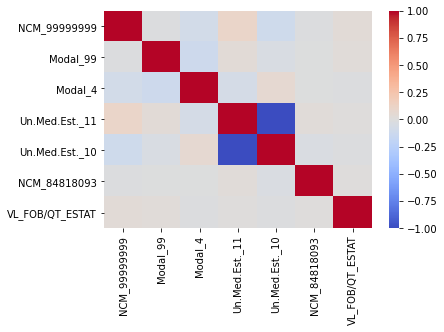

In [106]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False )

In [107]:
#Considerando que as Un.Med.Est._11 e Un.Med.Est._10 estão fortemente relacionadas, irei retirar uma delas antes da elaboração do modelo
df2=df2.drop(columns="Un.Med.Est._11")

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [108]:
df2.columns

Index(['NCM_99999999', 'Modal_99', 'Modal_4', 'Un.Med.Est._10', 'NCM_84818093',
       'VL_FOB/QT_ESTAT'],
      dtype='object')

In [109]:
x = df2[['NCM_99999999', 'Modal_99', 'Modal_4', 'Un.Med.Est._10', 'NCM_84818093']]
y = df2['VL_FOB/QT_ESTAT']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lm = LinearRegression()

In [114]:
lm.fit(x_train,y_train)

LinearRegression()

In [115]:
# impressão do intercepto
print(lm.intercept_)

10993.081769894783


In [116]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
NCM_99999999,94364.960194
Modal_99,166957.177043
Modal_4,-9019.772199
Un.Med.Est._10,-8339.708541
NCM_84818093,124933.924467


In [117]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [119]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

In [121]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [122]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root mean squared error - RMSE

In [123]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [124]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [125]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

233531.48496854724

In [126]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

213740.5720215622

In [127]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

214567.5093442076

#### Mean absolute error - MAE

In [128]:
from sklearn.metrics import mean_absolute_error

In [129]:
MAE_LR=mean_absolute_error(y_test, predicoesLR)
MAE_LR

18681.930976383963

In [130]:
MAE_RFR=mean_absolute_error(y_test, predicoesRFR)
MAE_RFR

15309.402498885944

In [131]:
MAE_GBR=mean_absolute_error(y_test, predicoesGBR)
MAE_GBR

15395.210659061258

#### Mean squared error - MSE

In [132]:
from sklearn.metrics import mean_absolute_error

In [133]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

54536954471.61481

In [134]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

45685032128.104614

In [135]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

46039216066.17661

#### Coeficente de determinação - R²

In [136]:
from sklearn.metrics import r2_score

In [137]:
R2_LR=r2_score(y_test, predicoesLR)
R2_LR

0.005649383489256921

In [138]:
R2_RFR=r2_score(y_test, predicoesRFR)
R2_RFR

0.16704296559981946

In [139]:
R2_GBR=r2_score(y_test, predicoesGBR)
R2_GBR

0.16058527061864125